In [1]:
#!pip install mysql-connector-python
import pandas as pd
import mysql.connector

In [2]:
conn = mysql.connector.connect(
host = 'localhost',
    user = 'root',
    passwd = 'sarvesh9901',
    database = 'e_master_card'
)

In [3]:
df_cust = pd.read_sql("select * from customers" ,conn)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [4]:
df_tran = pd.read_sql("select * from transactions" , conn)
df_tran.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [5]:
df_cs = pd.read_sql("select * from credit_profiles", conn)
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [6]:
df_cust[df_cust.annual_income == 0].shape

(50, 8)

In [7]:
occupation_med = df_cust.groupby("occupation")['annual_income'].median()
occupation_med["Artist"]

44915.0

**Removing Null values w.r.t to median of occupation of their annual incomes**

In [8]:
def set_median(row):
    if row['annual_income']==0:
        return occupation_med[row['occupation']]
    else:
        return row['annual_income']
set_median({'occupation':"Artist", 'annual_income':0})

44915.0

In [9]:
df_cust['annual_income'] = df_cust.apply(lambda row : set_median(row) , axis =1)

In [10]:
df_cust.iloc[[14,22]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,44915.0,Married
22,23,Ishan Patel,Male,19,City,Freelancer,36863.0,Married


In [11]:
df_cust.at[4, 'name']

'Advait Malik'

In [12]:
for index , row in df_cust.iterrows():
    if row['annual_income']<100:
        df_cust.at[index ,'annual_income'] = occupation_med[row['occupation']]

In [13]:
df_cust[df_cust['annual_income']< 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


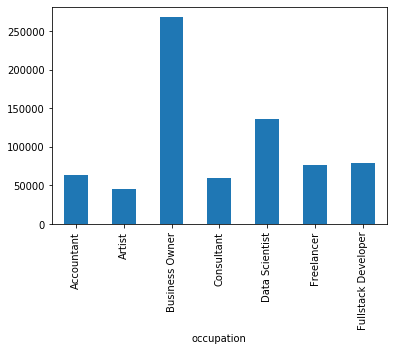

In [14]:
df_cust.groupby('occupation')['annual_income'].mean().plot(kind = 'bar')


In [15]:
cat_cols = ['gender','location','marital_status']
for val in cat_cols:
    agg = df_cust.groupby(val)['annual_income'].mean().sort_values()
    

**Outlier Removal in age column**

In [16]:
age_med = df_cust.groupby('occupation')['age'].median()
def set_age(row):
    if ((row['age'] < 15)  or (row['age'] >80)):
        return age_med[row['occupation']]
    else:
        return row['age']
age_med

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [17]:

df_cust['age'] = df_cust.apply(lambda row :set_age(row),axis=1)

In [18]:
df_cust.age.describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [19]:
def get_age_group(row):
    if row['age'] >18 and row['age'] <25:
        return '18-25'
    elif row['age'] >26 and row['age'] <45:
        return '26-45'
    else:
        return '46-80'

In [20]:
df_cust['age_group'] = df_cust.apply(lambda row: get_age_group(row),axis =1)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,46-80
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,46-80
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,46-80


In [21]:
age_group_count = df_cust.age_group.value_counts(normalize=True)

[]

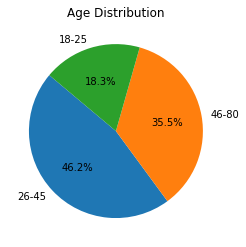

In [22]:
import matplotlib.pyplot as plt
plt.pie(age_group_count, labels=age_group_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Age Distribution")
plt.plot()

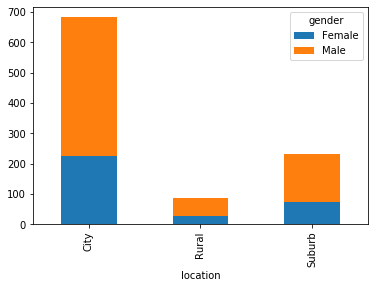

In [23]:
customer_gender_dist = df_cust.groupby(['location','gender']).size().unstack()
customer_gender_dist.plot(kind='bar', stacked= True)
plt.show()

**Exploring Credit Score Table**

In [24]:
df_cs.shape # there are 4 duplicate records

(1004, 6)

In [25]:
df_cust.shape

(1000, 9)

In [26]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [27]:
df_cs_clean = df_cs.drop_duplicates(subset= "cust_id", keep = 'last')
df_cs_clean.shape # here now we get equal shape of credit socre table with customers table

(1000, 6)

In [28]:
df_cs_clean[df_cs_clean['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [29]:
#cheking null values
df_cs_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [30]:
df_cs_clean[df_cs_clean.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [31]:
df_cs_clean.credit_limit.value_counts().sort_values()

20000.0     42
1250.0      75
750.0       76
1000.0      90
1500.0     100
40000.0    137
60000.0    186
500.0      229
Name: credit_limit, dtype: int64

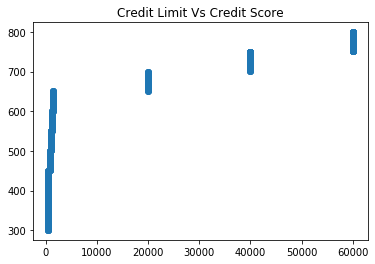

In [32]:
plt.scatter(df_cs_clean.credit_limit , df_cs_clean.credit_score)
plt.title("Credit Limit Vs Credit Score")
plt.show()

**We observed here that credit score is directly proportional to credit limit**

In [33]:
bin_ranges = [300 , 450,500,550,600,650,700,750,800]
bin_labels = [f'{start}-{end-1}' for start ,end in zip(bin_ranges, bin_ranges[1:])]
df_cs_clean['credit_score_range'] = pd.cut(df_cs_clean['credit_score'], bins = bin_ranges, labels=bin_labels , include_lowest=True, right= False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df_cs_clean

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [35]:
mode_df = df_cs_clean.groupby(['credit_score_range'])['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [36]:
df_cs_clean2 = pd.merge(df_cs_clean, mode_df, on='credit_score_range', suffixes=("","_mode"))


In [37]:
df_cs_clean2['credit_limit'].fillna('credit_limit_mode',inplace=True)

In [38]:
df_cs_clean3  = df_cs_clean2.copy()

In [39]:
df_cs_clean3.shape

(1000, 8)

In [40]:

df_cs_clean2['credit_limit'] = pd.to_numeric(df_cs_clean2['credit_limit'], errors='coerce')

In [41]:
def set_outstanding(row):
    if(row['outstanding_debt'] > row['credit_limit']):
        return row['credit_limit']
    else:
        return row['outstanding_debt']
set_outstanding({'outstanding_debt': 8000, 'credit_limit':9000})

8000

In [42]:
df_cs_clean2.loc[df_cs_clean2.outstanding_debt > df_cs_clean2.credit_limit,"outstanding_debt"] = df_cs_clean2['credit_limit']

In [43]:
df_cs_clean2[df_cs_clean2.outstanding_debt > df_cs_clean2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


**Handle Null values and outliers in Transaction Table**

In [44]:
df_tran[df_tran.platform == None]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [45]:
df_tran.platform.value_counts()

Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: platform, dtype: int64

In [46]:
df_tran.platform.fillna("Amazon" , inplace=True)

**Outlier Removal in tran_amount**

In [47]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [48]:
df_tran.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [49]:
df_tran[df_tran['tran_amount'] ==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [50]:
df_tran1 = df_tran[(df_tran['platform']=='Amazon') & (df_tran.product_category=='Electronics') & (df_tran.payment_type=='Credit Card')]

In [51]:
median_to_replace = df_tran1[df_tran1.tran_amount > 0].tran_amount.median()
median_to_replace

554.0

In [52]:
df_tran['tran_amount'].replace(0, median_to_replace, inplace=True)

In [53]:
df_tran[df_tran.tran_amount ==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [54]:
# checking outliers in tran_amount
q1, q3 = df_tran['tran_amount'].quantile([0.25,0.75])
iqr = q3-q1
lower = q1- 2*iqr
upper = q3 + 2*iqr
lower, upper

(-628.0, 1107.0)

In [55]:
df_tran_outlier=df_tran[df_tran['tran_amount']>=upper]
df_tran_normal=df_tran[df_tran['tran_amount']<upper]

In [56]:
tran_mean = df_tran_normal.groupby("product_category")['tran_amount'].mean()
tran_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [57]:
df_tran.loc[df_tran_outlier.index , 'tran_amount'] = df_tran_outlier['product_category'].map(tran_mean)

In [58]:
df_tran.loc[df_tran_outlier.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


In [59]:

import seaborn as sns


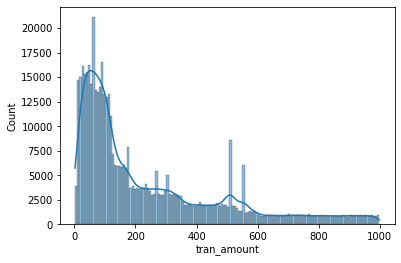

In [60]:
sns.histplot(df_tran.tran_amount, kde = True)

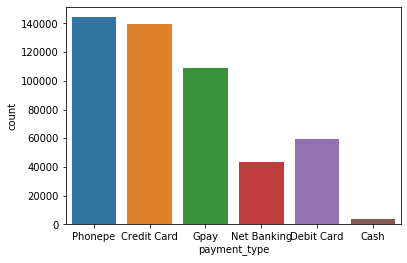

In [61]:
 sns.countplot(x=df_tran.payment_type)
plt.show()

In [62]:
df_merge2 = pd.merge(df_tran ,df_cust, on='cust_id', how = 'inner')
df_merge2.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe,Kriti Jain,Female,22.0,City,Fullstack Developer,47403.0,Married,18-25
1,780,705,2023-01-01,300.0,Shopify,Electronics,Gpay,Kriti Jain,Female,22.0,City,Fullstack Developer,47403.0,Married,18-25
2,1809,705,2023-01-01,59.0,Meesho,Fashion & Apparel,Debit Card,Kriti Jain,Female,22.0,City,Fullstack Developer,47403.0,Married,18-25
3,3622,705,2023-01-02,51.0,Flipkart,Fashion & Apparel,Gpay,Kriti Jain,Female,22.0,City,Fullstack Developer,47403.0,Married,18-25
4,3693,705,2023-01-02,44.0,Alibaba,Books,Phonepe,Kriti Jain,Female,22.0,City,Fullstack Developer,47403.0,Married,18-25


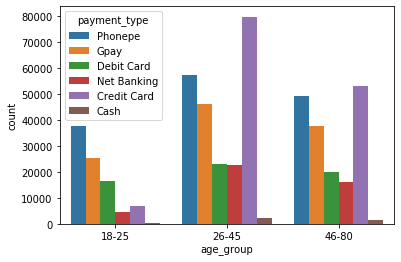

In [63]:
sns.countplot(x= 'age_group', hue = 'payment_type', data= df_merge2)
plt.show()

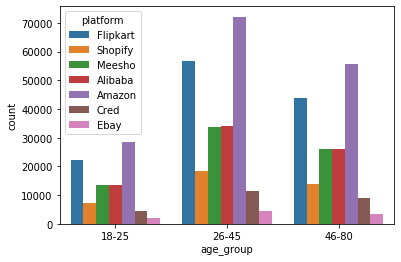

In [64]:
sns.countplot(x= 'age_group', hue = 'platform', data= df_merge2)
plt.show()

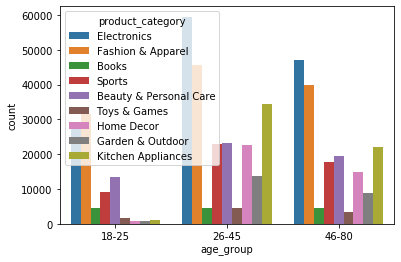

In [65]:

sns.countplot(x= 'age_group', hue = 'product_category', data= df_merge2)
plt.show()

**Insights Gentated**

1.People with age group 18-25 having 25% codebase in data.

2.Avg income of this group is less than 50k.

3.They don't have much cerdit history which not affect on credit score.

4.Usage of Credit card is low as compare to other age groups.

In [110]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [76]:
alpha = 0.05
power = 0.8
effect_size = 0.2

sms.tt_ind_solve_power(
effect_size= effect_size,
alpha=alpha,
power = power,
ratio =1,
alternative='two-sided') #it gives us sample size.

393.4056989990322

In [79]:
effect_sizes = [0.1, 0.2, 0.3,0.4,0.5,1]
for effect_size in effect_sizes:
    samples = sms.tt_ind_solve_power(
    effect_size= effect_size,
    alpha=alpha,
    power = power,
    ratio =1,
    alternative='two-sided')
    print(f'Effect_size = {effect_size} , sample = {samples}')

Effect_size = 0.1 , sample = 1570.7330663315129
Effect_size = 0.2 , sample = 393.4056989990322
Effect_size = 0.3 , sample = 175.38467227482144
Effect_size = 0.4 , sample = 99.08032683981111
Effect_size = 0.5 , sample = 63.76561177540974
Effect_size = 1 , sample = 16.71472257227618


**Here we decided to keep our sample size to be 100 . as effect size 0.4 gives us answer 99.**

In [81]:
df = pd.read_csv('avg_transactions_after_campaign.csv')
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,10-09-2023,259.83,277.32
1,11-09-2023,191.27,248.68
2,12-09-2023,212.41,286.61
3,13-09-2023,214.92,214.85
4,14-09-2023,158.55,344.08


[]

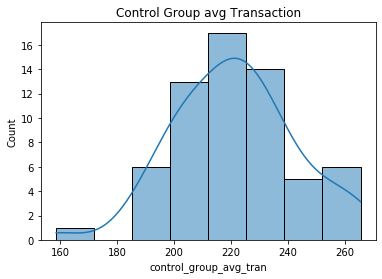

In [96]:

sns.histplot(df['control_group_avg_tran'], kde = True)
plt.title("Control Group avg Transaction")
plt.plot()


Text(0.5, 1.0, 'Test Group avg Transaction')

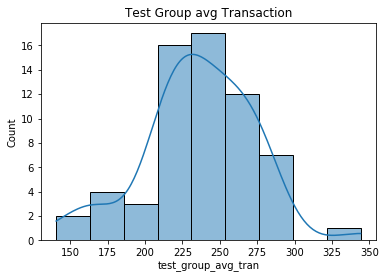

In [99]:
sns.histplot(df['test_group_avg_tran'], kde = True)
plt.title("Test Group avg Transaction")


In [102]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']]

,campaign_date,control_group_avg_tran,test_group_avg_tran
3,13-09-2023,214.92,214.85
8,18-09-2023,265.13,212.60
9,19-09-2023,232.88,207.63
16,26-09-2023,222.95,213.30
22,02-10-2023,238.39,203.10
23,03-10-2023,253.95,234.26
25,05-10-2023,239.47,216.37
26,06-10-2023,200.70,166.70
27,07-10-2023,200.91,170.01
28,08-10-2023,188.30,150.27


In [105]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']].shape[0]  / df.shape[0] * 100

29.03225806451613

In [108]:
control_mean = df['control_group_avg_tran'].mean()
control_std = df['control_group_avg_tran'].std()
test_mean = df['test_group_avg_tran'].mean()
test_std = df['test_group_avg_tran'].std()
control_mean , control_std , test_mean, test_std 

(221.1751612903226, 21.359192112027014, 235.98354838709682, 36.65808210918637)

In [113]:
sample_size = df.shape[0]
a = test_std**2 / sample_size
b = control_std**2 / sample_size
zscore = (test_mean - control_mean) / np.sqrt(a+b)
zscore

2.748297374569119

In [115]:
z_critical = st.norm.ppf(1-alpha)
z_critical

1.6448536269514722

In [117]:
zscore > z_critical

True

In [120]:
p_value  = 1-st.norm.cdf(zscore)
p_value

0.0029952824622024865

In [121]:
p_value < zscore

True

In [127]:
#direct using ztest
ztest = sm.stats.ztest(df['test_group_avg_tran'], df['control_group_avg_tran'], alternative='larger')
ztest

(2.7482973745691135, 0.002995282462202502)

**here we observed that p_value < zscore hence we reject Null Hypothesis**

**We can conclude that Our new Credit Card will perform better than old one.**